## Exploratory Data Analysis (EDA)

In [11]:
import pandas as pd


df = pd.read_csv("screendata.csv")
df.head()

,date,total_screentime_hour,social_media_screentime_hour,pickup_number,notifications,sleep_time_hour
0,2025-03-01,3.6,2.0,152,43,8.1
1,2025-03-02,7.5,3.8,229,38,6.1
2,2025-03-03,6.0,3.3,142,119,7.5
3,2025-03-04,5.1,3.1,64,82,8.0
4,2025-03-05,2.1,1.0,156,159,7.9


In [12]:
df.shape

(54, 6)

In [13]:
df.columns

Index(['date', 'total_screentime_hour', 'social_media_screentime_hour',
       'pickup_number', 'notifications', 'sleep_time_hour'],
      dtype='object')

In [14]:
df.total_screentime_hour.value_counts()

total_screentime_hour
2.2    3
7.6    3
3.1    3
3.0    2
5.1    2
2.1    2
1.4    2
7.5    2
2.4    2
4.6    2
5.2    2
4.0    1
1.8    1
4.4    1
1.2    1
7.2    1
3.6    1
2.8    1
1.6    1
5.5    1
4.7    1
2.3    1
6.3    1
7.4    1
5.7    1
4.1    1
6.5    1
1.3    1
5.0    1
4.5    1
6.4    1
3.5    1
1.9    1
3.9    1
6.7    1
1.1    1
5.8    1
6.9    1
6.0    1
7.1    1
Name: count, dtype: int64

In [15]:
df.describe()

,total_screentime_hour,social_media_screentime_hour,pickup_number,notifications,sleep_time_hour
count,54.000000,54.000000,54.000000,54.000000,54.000000
mean,4.268519,2.127778,150.907407,97.500000,7.296296
std,2.071899,1.128267,57.592344,44.568264,0.908651
min,1.100000,0.500000,51.000000,31.000000,5.500000
25%,2.325000,1.025000,104.750000,62.500000,6.725000
50%,4.250000,2.200000,150.500000,93.000000,7.200000
75%,5.950000,3.100000,200.500000,134.500000,8.100000
max,7.600000,4.100000,241.000000,175.000000,9.000000


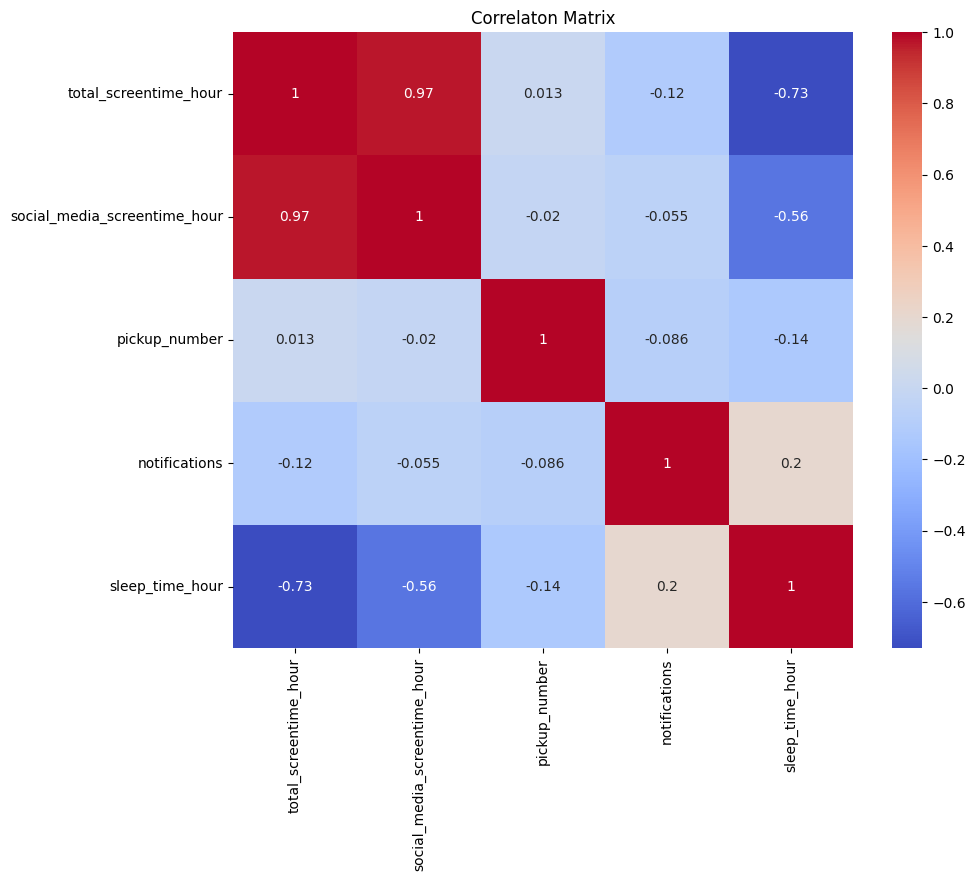

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt


numeric_df = df.drop('date', axis=1)


plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlaton Matrix')
plt.show()

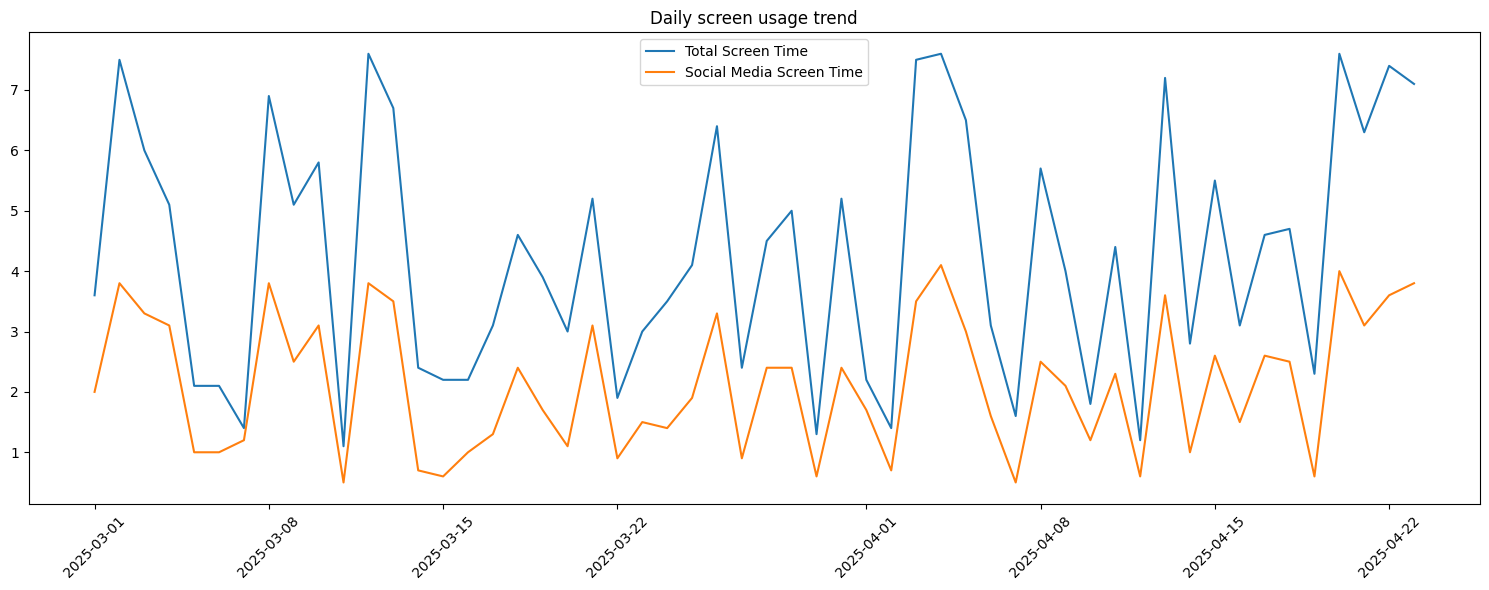

In [17]:

df['date'] = pd.to_datetime(df['date'])


plt.figure(figsize=(15, 6))
plt.plot(df['date'], df['total_screentime_hour'], label='Total Screen Time')
plt.plot(df['date'], df['social_media_screentime_hour'], label='Social Media Screen Time')
plt.title('Daily screen usage trend')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

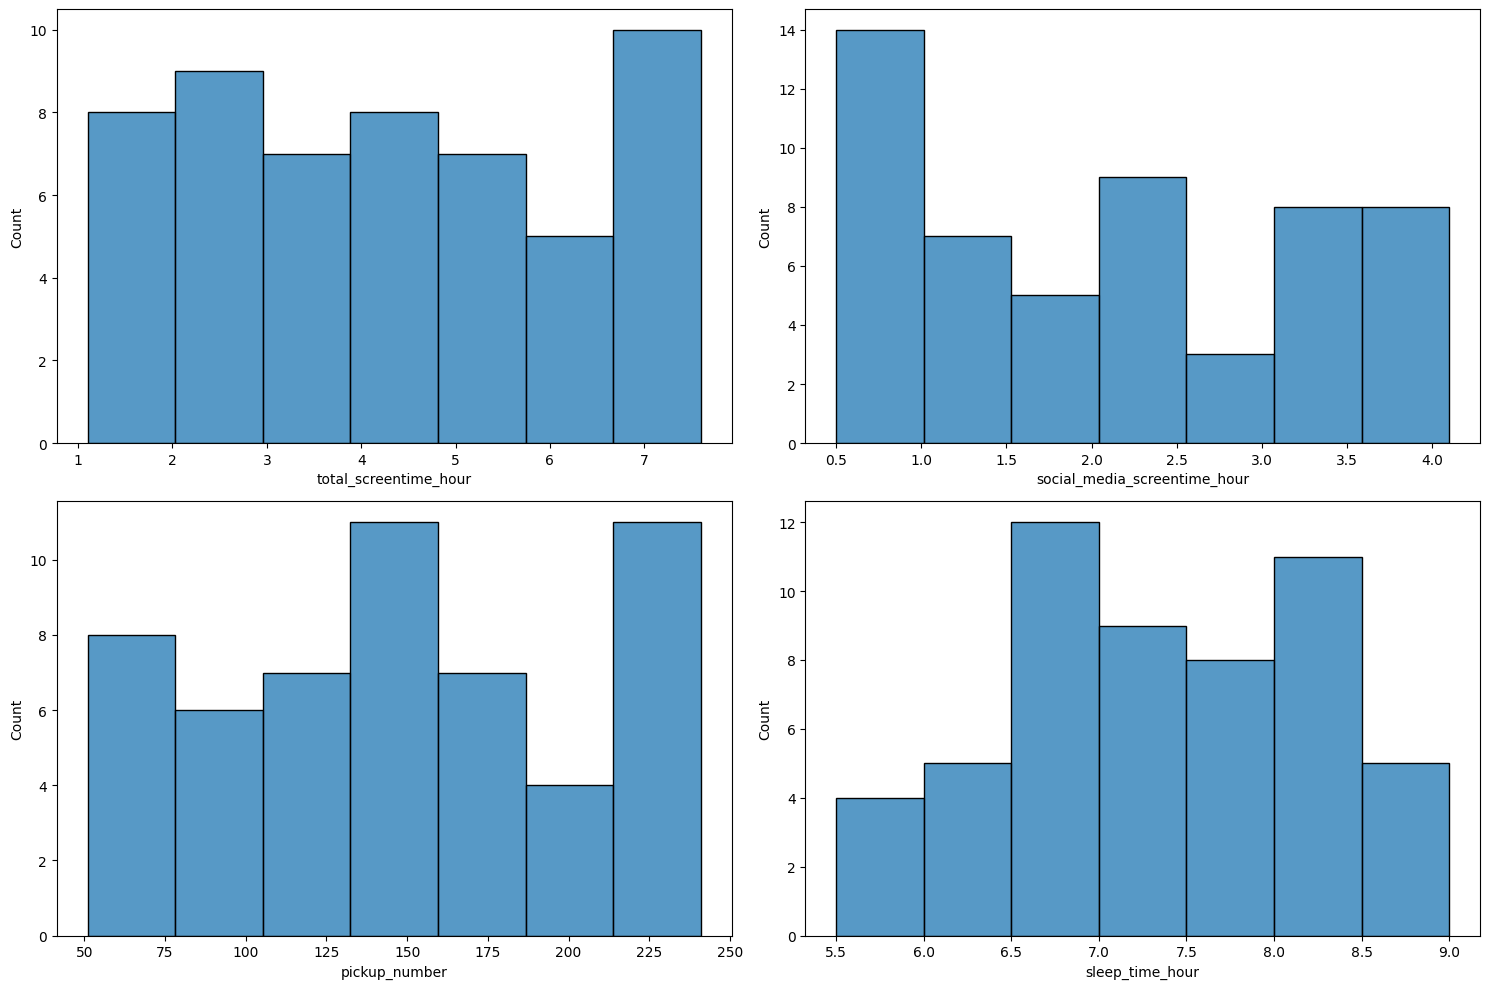

In [18]:

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.histplot(data=df, x='total_screentime_hour', ax=axes[0,0])
sns.histplot(data=df, x='social_media_screentime_hour', ax=axes[0,1])
sns.histplot(data=df, x='pickup_number', ax=axes[1,0])
sns.histplot(data=df, x='sleep_time_hour', ax=axes[1,1])
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

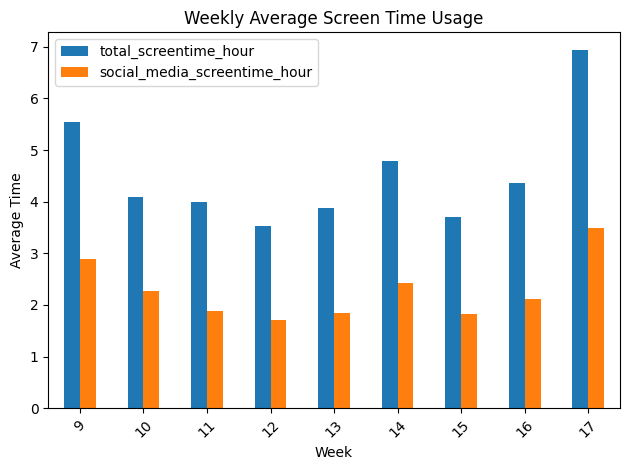

In [19]:

df['week'] = df['date'].dt.isocalendar().week
weekly_avg = df.groupby('week')[['total_screentime_hour', 'social_media_screentime_hour']].mean()

plt.figure(figsize=(12, 6))
weekly_avg.plot(kind='bar')
plt.title('Weekly Average Screen Time Usage')
plt.xlabel('Week')
plt.ylabel('Average Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Hypothesis Testing

After doing Exploratory Data Analysis (EDA), I have concluded that there is no string correlation between my hours of slepe and phone pick up number or my notification numbers. Therefore, my hypothesis testing will be based on my total screentime hour and my social media screen time hour. Furthermore, according to the heatmap table, we can clearly say that my screentime hour and my social media screen time hour are strongly correlated. Therefore, my hypothesis testing will be about the relationship between my social media screen time hour and my hours of sleep.

### Null Hypothesis (H₀):

There is no significant relationship between social media screen time and sleep duration.



### Alternative Hypothesis (H₁):

There is a significant relationship between social media screen time and sleep duration.



In [21]:
from scipy.stats import pearsonr


corr, p_value = pearsonr(df['social_media_screentime_hour'], df['sleep_time_hour'])

print(f"Pearson correlation coefficient (r): {corr:.4f}")
print(f"P-value: {p_value:.4f}")


alpha = 0.05
if p_value < alpha:
    print("Reject H₀: There is a statistically significant relationship between social media screen time and sleep duration.")
    if corr < 0:
        print("The relationship is negative: as social media use increases, sleep duration tends to decrease.")
    else:
        print("The relationship is positive: as social media use increases, sleep duration tends to increase.")
else:
    print("Fail to reject H₀: There is no statistically significant relationship between social media screen time and sleep duration.")

Pearson correlation coefficient (r): -0.5627
P-value: 0.0000
Reject H₀: There is a statistically significant relationship between social media screen time and sleep duration.
The relationship is negative: as social media use increases, sleep duration tends to decrease.


### Hypothesis Testing Report

A Pearson correlation analysis was conducted to examine the relationship between social media screen time and sleep duration.
The results revealed a moderate negative correlation (r = -0.5627, p < 0.001), indicating that as social media usage increases, sleep duration tends to decrease.

Since the p-value is well below the significance level of 0.05, we reject the null hypothesis.
This suggests that the relationship is statistically significant, although not extremely strong. It implies that social media usage may be a factor influencing sleep duration, among other potential variables.

Mean Squared Error (MSE): 0.06887358777102882
R^2 Score: 0.8853054759111686


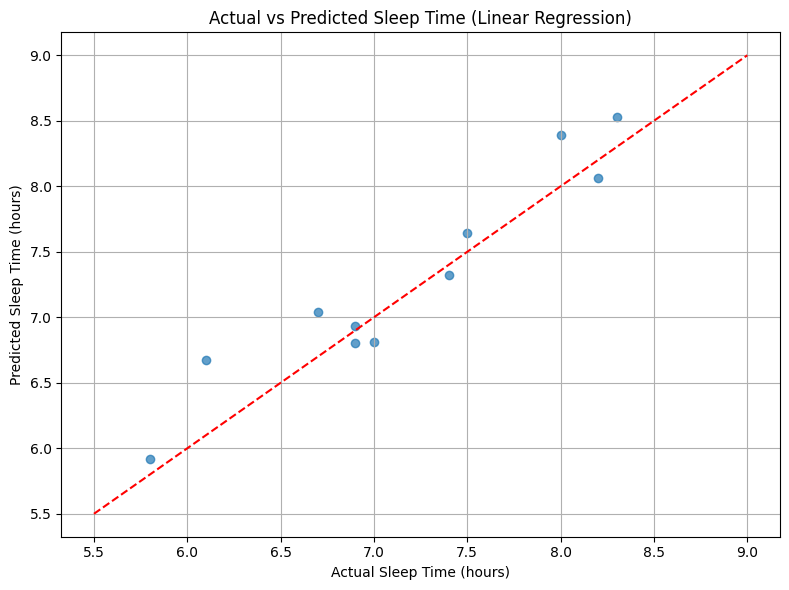

In [ ]:
#linear regression
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv("screendata.csv")

# Set the input features (phone habits) and target variable (sleep time)
X = df[['social_media_screentime_hour', 'pickup_number', 'notifications', 'total_screentime_hour']]
y = df['sleep_time_hour']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and train the Linear Regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predict sleep time on the test set
y_pred = regressor.predict(X_test)

# Evaluate the model performance
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

# Plot: Actual vs Predicted Sleep Time
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Perfect prediction line
plt.xlabel("Actual Sleep Time (hours)")
plt.ylabel("Predicted Sleep Time (hours)")
plt.title("Actual vs Predicted (Linear Regression)")
plt.grid(True)
plt.tight_layout()
plt.show()

Mean Squared Error (MSE): 0.42498072727272834
R^2 Score: 0.29228367740159467


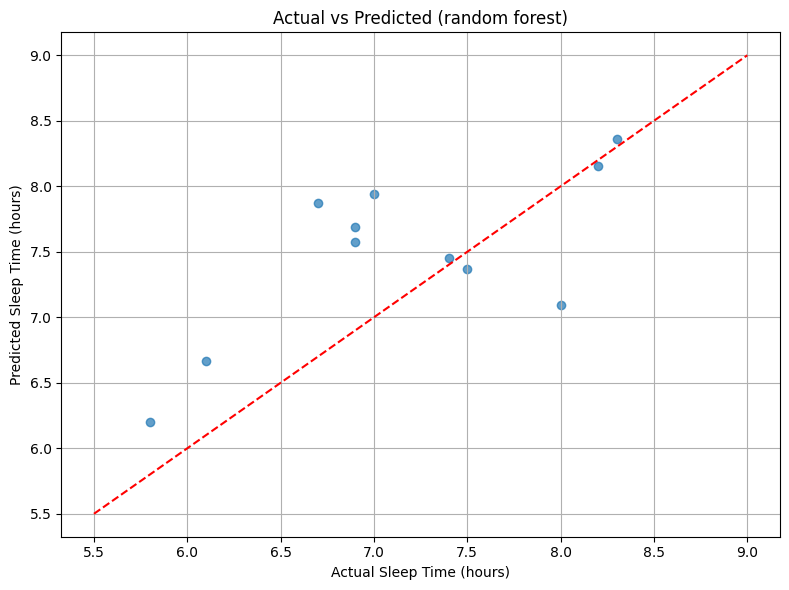

In [3]:
#random forest
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv("screendata.csv")

# Set the input features (phone habits) and target variable (sleep time)
X = df[['social_media_screentime_hour', 'pickup_number', 'notifications', 'total_screentime_hour']]
y = df['sleep_time_hour']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and train the Random Forest Regressor
regressor = RandomForestRegressor(random_state=42)
regressor.fit(X_train, y_train)

# Predict sleep time on the test set
y_pred = regressor.predict(X_test)

# Evaluate the model performance
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

#  Actual vs Predicted Sleep Time ---
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Ideal line
plt.xlabel("Actual Sleep Time (hours)")
plt.ylabel("Predicted Sleep Time (hours)")
plt.title("Actual vs Predicted (random forest)")
plt.grid(True)
plt.tight_layout()
plt.show()